In [1]:
import pandas as pd
from Bio import SeqIO
import gzip
import matplotlib.pyplot as plt
import numpy as np
import math

# Chr01 example

In [123]:
from IPython.display import Image

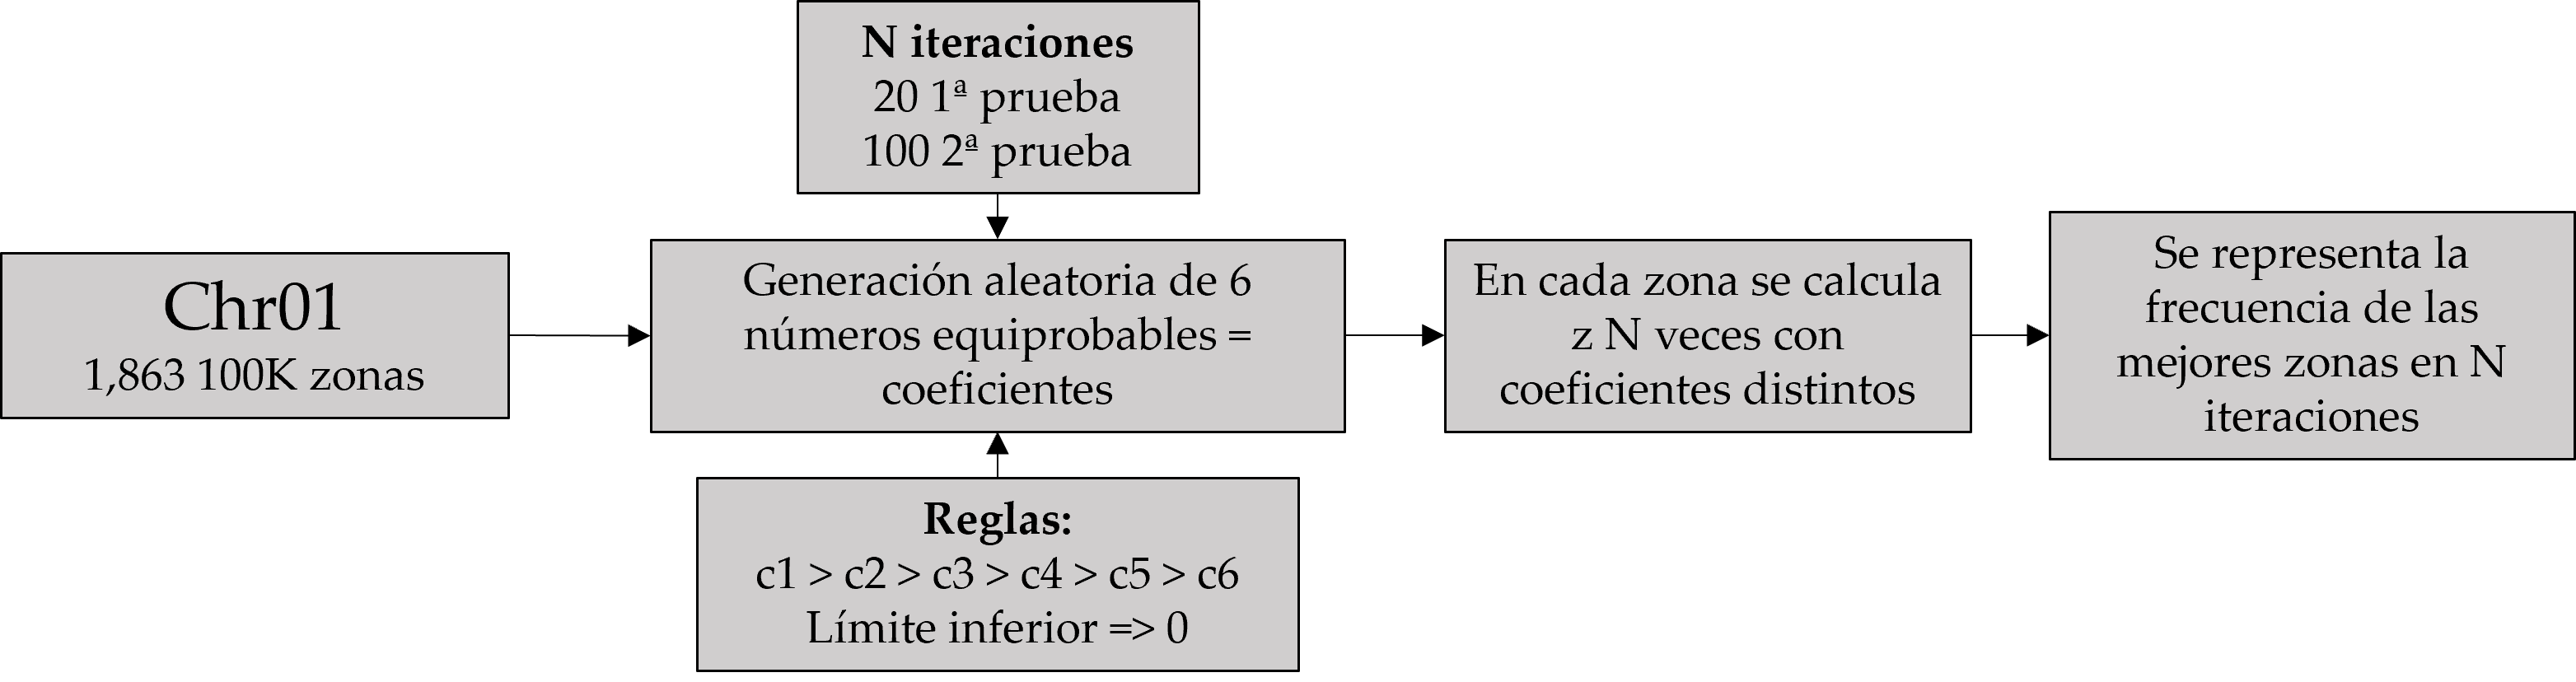

In [124]:
Image(filename="./Figure_coef.png")

In [2]:
data = pd.read_csv("./data_quintile_round_inNiben261.txt", sep = "\t", header = 0)
Niben261 = pd.read_csv("./Niben261_genes.txt", sep = "\t", header = 0, index_col = 0)
Niben261chr = Niben261[Niben261.index.str.contains("Chr")]
quintile_genes = data.index.tolist() # genes clasificados, con correspondencia en Niben101.
add_genes = list(set(Niben261chr.index.tolist()).difference(quintile_genes))
Niben261add = Niben261chr[Niben261chr.index.isin(add_genes)]
Niben261add["Chr"] = Niben261add.Chr.str.replace("Niben261Chr", "Chr")
Niben261add

C:\Users\milil\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Chr,Start,End
Gene,,,
Niben261Chr01g0001004,Chr01,138648,145484
Niben261Chr01g0003002,Chr01,305466,309127
Niben261Chr01g0004013,Chr01,433168,434139
Niben261Chr01g0005004,Chr01,509493,512123
Niben261Chr01g0005003,Chr01,512164,512450
...,...,...,...
Niben261Chr19g1484002,Chr19,148454367,148463060
Niben261Chr19g1485005,Chr19,148480135,148499120
Niben261Chr19g1485014,Chr19,148530961,148538381


In [3]:
data_complete = data.append(Niben261add)
data_complete

,Chr,Start,End,quintile
Niben261Chr01g0002008,Chr01,266317,268851,1.0
Niben261Chr01g0004001,Chr01,458230,462273,3.0
Niben261Chr01g0004003,Chr01,467574,480423,2.0
Niben261Chr01g0004011,Chr01,465674,466936,1.0
Niben261Chr01g0004012,Chr01,432045,433043,1.0
...,...,...,...,...
Niben261Chr19g1484002,Chr19,148454367,148463060,NaN
Niben261Chr19g1485005,Chr19,148480135,148499120,NaN
Niben261Chr19g1485014,Chr19,148530961,148538381,NaN
Niben261Chr19g1486029,Chr19,148623104,148631519,NaN


In [4]:
chrs = sorted(list(set(data_complete["Chr"]))) # List of chromosomes.
chrs

['Chr01',
 'Chr02',
 'Chr03',
 'Chr04',
 'Chr05',
 'Chr06',
 'Chr07',
 'Chr08',
 'Chr09',
 'Chr10',
 'Chr11',
 'Chr12',
 'Chr13',
 'Chr14',
 'Chr15',
 'Chr16',
 'Chr17',
 'Chr18',
 'Chr19']

In [5]:
# No ejecutar lo de arriba, tarda mucho, se ejecutó una vez y este es el resultado para los cromosomas.
chr_len = {'Niben261Chr01': 186295347,
 'Niben261Chr02': 151625522,
 'Niben261Chr03': 194605305,
 'Niben261Chr04': 189815799,
 'Niben261Chr05': 138451958,
 'Niben261Chr06': 148966868,
 'Niben261Chr07': 152648067,
 'Niben261Chr08': 137820123,
 'Niben261Chr09': 137640743,
 'Niben261Chr10': 138251820,
 'Niben261Chr11': 143669543,
 'Niben261Chr12': 158218613,
 'Niben261Chr13': 153652170,
 'Niben261Chr14': 153778118,
 'Niben261Chr15': 153112746,
 'Niben261Chr16': 148817306,
 'Niben261Chr17': 155116228,
 'Niben261Chr18': 148425545,
 'Niben261Chr19': 148948562}

In [6]:
chr01 = data_complete[data_complete["Chr"] == "Chr01"].sort_values('Start')
chr01

,Chr,Start,End,quintile
Niben261Chr01g0001004,Chr01,138648,145484,NaN
Niben261Chr01g0002008,Chr01,266317,268851,1.0
Niben261Chr01g0003002,Chr01,305466,309127,NaN
Niben261Chr01g0004012,Chr01,432045,433043,1.0
Niben261Chr01g0004013,Chr01,433168,434139,NaN
...,...,...,...,...
Niben261Chr01g1858003,Chr01,185840458,185843056,2.0
Niben261Chr01g1860003,Chr01,186028072,186031716,3.0
Niben261Chr01g1861002,Chr01,186120513,186121051,NaN
Niben261Chr01g1861003,Chr01,186121221,186121439,NaN


In [7]:
def split(length, window):
    intervals = {}
    index = 1
    interval = []
    number_intervals = math.ceil(length/window)
    for i in range(length):
        interval.append(i + 1)
        if index == number_intervals:
            intervals[index] = [intervals[index - 1][1] + 1, length]
            break
        if len(interval) == window:
            intervals[index] = [min(interval), max(interval)]
            index += 1
            interval = []
    return(intervals)

In [9]:
# Intervalos de 100K del Chr01:
window = 100000 # 100K.
intervals_chr01 = split(chr_len["Niben261Chr01"], window)

# Generación aleatoria de coeficientes:
20 iteraciones.

In [70]:
n_iter = 20 # número de iteraciones.
coef = {}
for i in range(n_iter):
    list_coef = sorted(np.random.uniform(0, 10, 6), reverse = True)
    print(list_coef)
    coef[i] = list_coef

[9.657837827364968, 8.963274418780752, 8.007349810859921, 5.031784831823786, 4.215951401991163, 2.589194255404501]
[9.923133477806243, 9.34795689903263, 6.939996925843653, 6.505437182292066, 6.48596208085249, 4.319916268706933]
[9.311661016701802, 8.18010712513732, 5.36899098575801, 1.0330317404635903, 0.6455093790333222, 0.6087899326517909]
[8.056725271619333, 7.694458490334019, 5.0218377878327045, 3.811168591593624, 2.067388997475735, 1.5113339599341935]
[8.135828322653763, 6.1964200744581674, 4.013355340836672, 2.356559244683891, 2.3028364827645174, 0.996972867428888]
[9.874281239063645, 9.323944155301376, 8.479199131487745, 6.7915119208090005, 6.414203844385005, 5.526529367609515]
[9.315145684600543, 9.140820942512036, 3.6971721312271013, 2.436011437225046, 1.3019768004135668, 0.019173497776050485]
[8.889846053155141, 8.507228701876754, 4.715517549797604, 3.2873344909883615, 1.158986692001095, 1.0403479237428603]
[9.650643126758178, 8.635943742379412, 6.299464689403562, 5.893510322

In [71]:
idoneidad = {}
for interval, values in intervals_chr01.items():
    for n in range(n_iter):
        chr01_values = chr01[(values[0] <= chr01["Start"]) & (chr01["Start"] < values[1])]
        z = coef[n][0] * len(chr01_values[chr01_values["quintile"] == 5]) + coef[n][1] * len(chr01_values[chr01_values["quintile"] == 4]) + coef[n][2] * len(chr01_values[chr01_values["quintile"] == 3]) + coef[n][3] * len(chr01_values[chr01_values["quintile"] == 2]) + coef[n][4] * len(chr01_values[chr01_values["quintile"] == 1]) + coef[n][5] * len(chr01_values[chr01_values["quintile"] == 0])
        idoneidad.setdefault(interval, []).append(z)

In [72]:
top_zones = []

for n in range(n_iter):
    z_max = -1000
    for k, v in idoneidad.items():
        if v[n] > z_max:
            z_max = v[n]
            window_max = k
    top_zones.append(window_max)

In [73]:
top_zones

[5, 5, 496, 5, 5, 5, 1517, 1517, 5, 5, 1517, 5, 5, 1517, 5, 5, 5, 5, 5, 5]

In [113]:
top_zones_freq = {}
for zone in top_zones:
    top_zones_freq[str(zone)] = top_zones_freq.get(str(zone), 0) + 1

In [115]:
top_zones_freq

{'5': 15, '496': 1, '1517': 4}

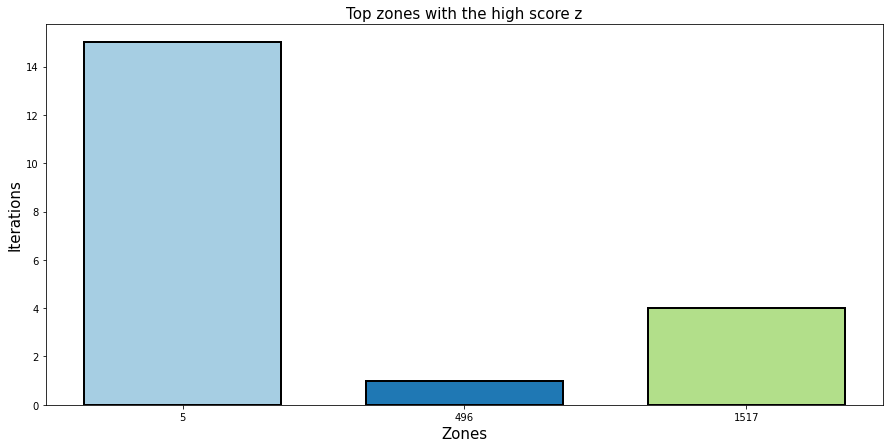

In [118]:
# Set colors to the bars using colormaps available in matplotlib

plt.figure(figsize=[15, 7])
col_map = plt.get_cmap('Paired')

# Creating a bar chart with bars of different color using colormap
plt.bar(list(top_zones_freq.keys()), list(top_zones_freq.values()), width=0.7, color=col_map.colors, edgecolor='k', 
        linewidth=2)

plt.title('Top zones with the high score z', fontsize=15)
plt.xlabel('Zones', fontsize=15)
plt.ylabel('Iterations', fontsize=15)
plt.show()

**Figure 1.** Número de veces que cada zona es escogida como la mejor en 20 iteraciones con coeficientes distintos.

# 100 itereaciones:

In [120]:
n_iter = 100 # número de iteraciones.
coef = {}
for i in range(n_iter):
    list_coef = sorted(np.random.uniform(0, 10, 6), reverse = True)
    #print(list_coef)
    coef[i] = list_coef
idoneidad = {}
for interval, values in intervals_chr01.items():
    for n in range(n_iter):
        chr01_values = chr01[(values[0] <= chr01["Start"]) & (chr01["Start"] < values[1])]
        z = coef[n][0] * len(chr01_values[chr01_values["quintile"] == 5]) + coef[n][1] * len(chr01_values[chr01_values["quintile"] == 4]) + coef[n][2] * len(chr01_values[chr01_values["quintile"] == 3]) + coef[n][3] * len(chr01_values[chr01_values["quintile"] == 2]) + coef[n][4] * len(chr01_values[chr01_values["quintile"] == 1]) + coef[n][5] * len(chr01_values[chr01_values["quintile"] == 0])
        idoneidad.setdefault(interval, []).append(z)

In [121]:
top_zones = []

for n in range(n_iter):
    z_max = -1000
    for k, v in idoneidad.items():
        if v[n] > z_max:
            z_max = v[n]
            window_max = k
    top_zones.append(window_max)
top_zones_freq = {}
for zone in top_zones:
    top_zones_freq[str(zone)] = top_zones_freq.get(str(zone), 0) + 1

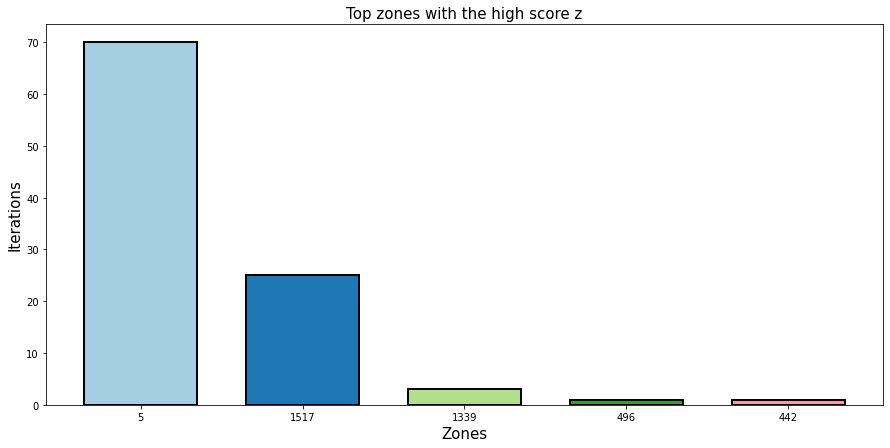

In [122]:
# Set colors to the bars using colormaps available in matplotlib

plt.figure(figsize=[15, 7])
col_map = plt.get_cmap('Paired')

# Creating a bar chart with bars of different color using colormap
plt.bar(list(top_zones_freq.keys()), list(top_zones_freq.values()), width=0.7, color=col_map.colors, edgecolor='k', 
        linewidth=2)

plt.title('Top zones with the high score z', fontsize=15)
plt.xlabel('Zones', fontsize=15)
plt.ylabel('Iterations', fontsize=15)
plt.show()

**Figure 2.** Número de veces que cada zona es escogida como la mejor en 100 iteraciones con coeficientes distintos.

# 100 iteraciones con límite inferior superior superior a 0.

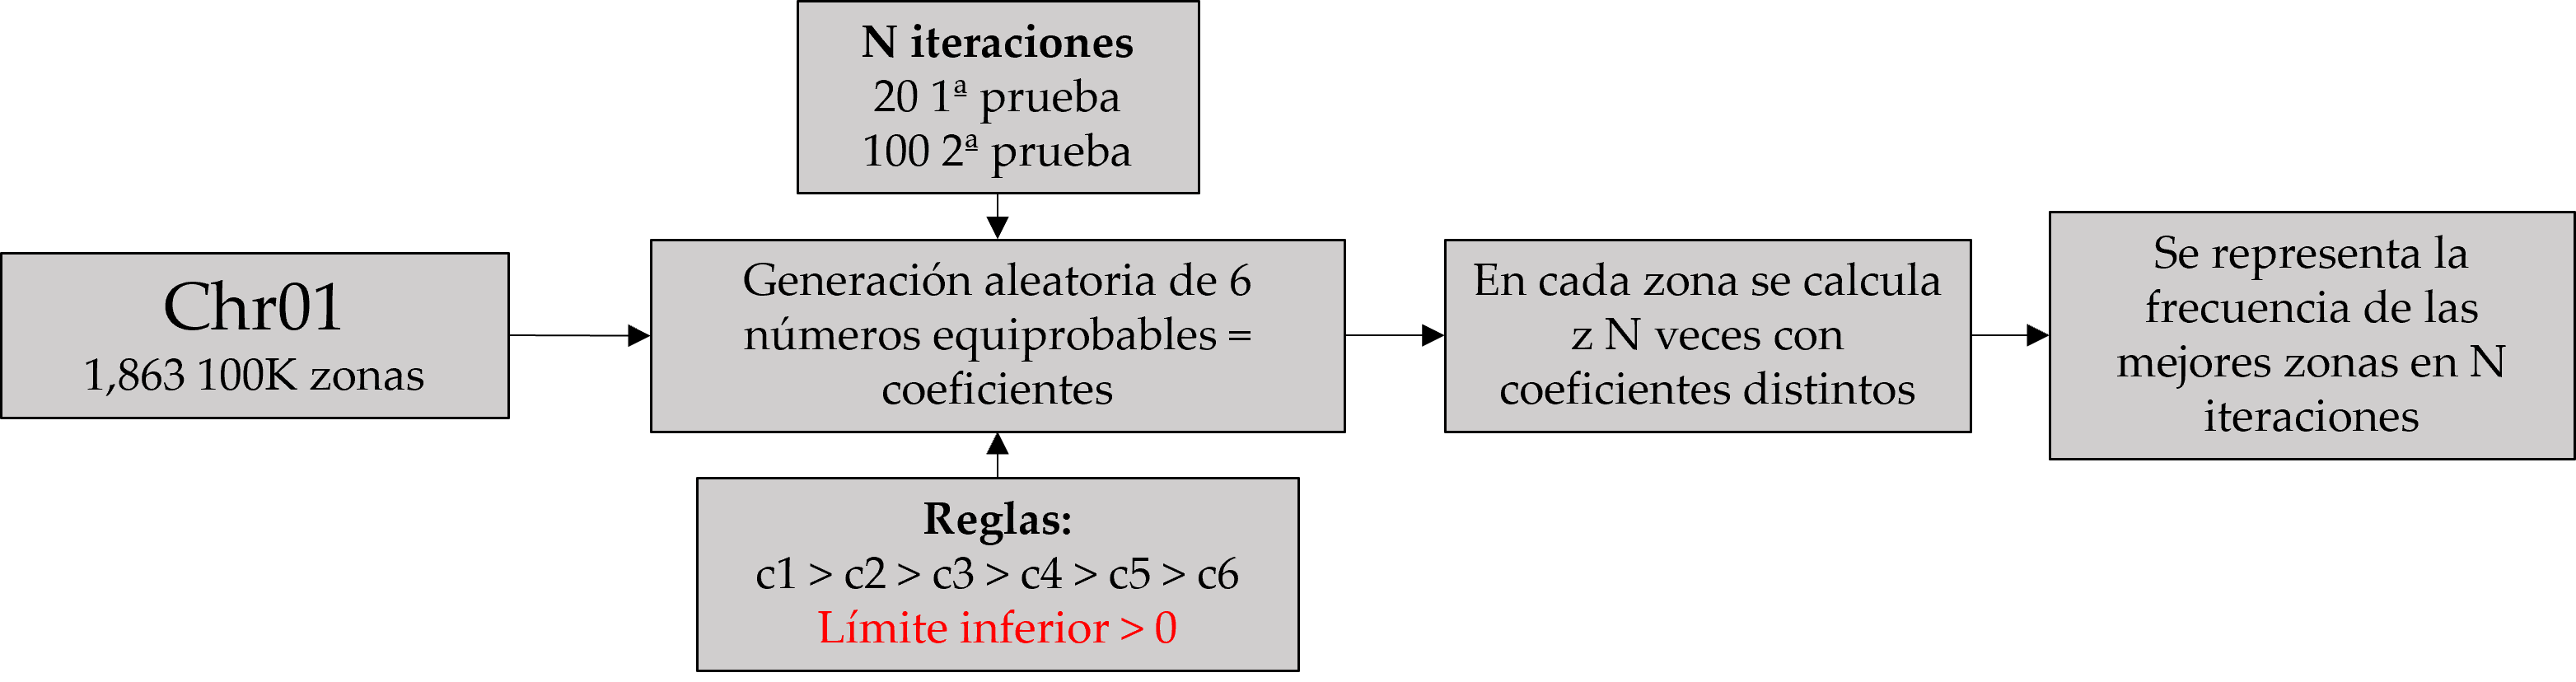

In [132]:
Image(filename="./Figure_coef2.png")

In [126]:
n_iter = 100 # número de iteraciones.
coef = {}
for i in range(n_iter):
    list_coef = sorted(np.random.uniform(1, 10, 6), reverse = True)
    #print(list_coef)
    coef[i] = list_coef
idoneidad = {}
for interval, values in intervals_chr01.items():
    for n in range(n_iter):
        chr01_values = chr01[(values[0] <= chr01["Start"]) & (chr01["Start"] < values[1])]
        z = coef[n][0] * len(chr01_values[chr01_values["quintile"] == 5]) + coef[n][1] * len(chr01_values[chr01_values["quintile"] == 4]) + coef[n][2] * len(chr01_values[chr01_values["quintile"] == 3]) + coef[n][3] * len(chr01_values[chr01_values["quintile"] == 2]) + coef[n][4] * len(chr01_values[chr01_values["quintile"] == 1]) + coef[n][5] * len(chr01_values[chr01_values["quintile"] == 0])
        idoneidad.setdefault(interval, []).append(z)

In [127]:
top_zones = []

for n in range(n_iter):
    z_max = -1000
    for k, v in idoneidad.items():
        if v[n] > z_max:
            z_max = v[n]
            window_max = k
    top_zones.append(window_max)
top_zones_freq = {}
for zone in top_zones:
    top_zones_freq[str(zone)] = top_zones_freq.get(str(zone), 0) + 1

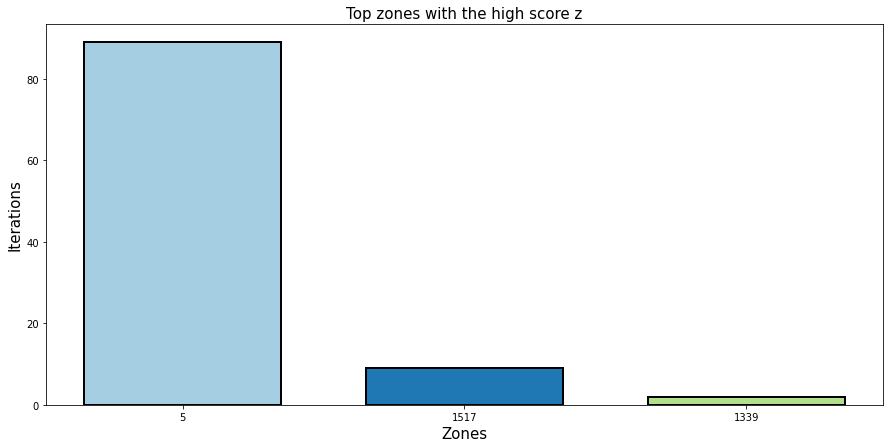

In [128]:
# Set colors to the bars using colormaps available in matplotlib

plt.figure(figsize=[15, 7])
col_map = plt.get_cmap('Paired')

# Creating a bar chart with bars of different color using colormap
plt.bar(list(top_zones_freq.keys()), list(top_zones_freq.values()), width=0.7, color=col_map.colors, edgecolor='k', 
        linewidth=2)

plt.title('Top zones with the high score z', fontsize=15)
plt.xlabel('Zones', fontsize=15)
plt.ylabel('Iterations', fontsize=15)
plt.show()

**Figure 3.** Número de veces que cada zona es escogida como la mejor en 100 iteraciones con coeficientes distintos si el límite inferior es superior a 0.

# Genes en las ventanas 5, 1517 y 1339:

In [146]:
chr01_5 = chr01[(intervals_chr01[5][0] <= chr01["Start"]) & (chr01["Start"] < intervals_chr01[5][1])]
chr01_5

,Chr,Start,End,quintile
Niben261Chr01g0004012,Chr01,432045,433043,1.0
Niben261Chr01g0004013,Chr01,433168,434139,NaN
Niben261Chr01g0004017,Chr01,436663,441296,3.0
Niben261Chr01g0004001,Chr01,458230,462273,3.0
Niben261Chr01g0004011,Chr01,465674,466936,1.0
Niben261Chr01g0004003,Chr01,467574,480423,2.0
Niben261Chr01g0005002,Chr01,487059,494436,3.0


In [145]:
chr01_1517 = chr01[(intervals_chr01[1517][0] <= chr01["Start"]) & (chr01["Start"] < intervals_chr01[1517][1])]
chr01_1517

,Chr,Start,End,quintile
Niben261Chr01g1516006,Chr01,151640436,151641709,4.0
Niben261Chr01g1516003,Chr01,151646980,151651689,5.0
Niben261Chr01g1516002,Chr01,151656898,151660096,2.0
Niben261Chr01g1516017,Chr01,151670927,151680247,1.0


In [147]:
chr01_1339 = chr01[(intervals_chr01[1339][0] <= chr01["Start"]) & (chr01["Start"] < intervals_chr01[1339][1])]
chr01_1339

,Chr,Start,End,quintile
Niben261Chr01g1339013,Chr01,133804996,133807193,1.0
Niben261Chr01g1339012,Chr01,133807224,133807646,0.0
Niben261Chr01g1339010,Chr01,133807665,133807965,NaN
Niben261Chr01g1338002,Chr01,133809442,133818413,3.0
Niben261Chr01g1339011,Chr01,133813769,133813989,NaN
Niben261Chr01g1338005,Chr01,133828671,133830010,0.0
Niben261Chr01g1338006,Chr01,133830302,133830882,NaN
Niben261Chr01g1338007,Chr01,133830894,133831929,NaN
Niben261Chr01g1338004,Chr01,133831931,133832433,1.0
Niben261Chr01g1339014,Chr01,133832804,133833033,NaN


Si dejamos la fórmula, estamos dando más puntuación a las zonas con más genes:

Por ejemplo, la zona 1339 no tiene genes altamente expresados, pero al tener más genes no expresados o bajamente expresados está consiguiendo más puntuación que las zonas sin genes, cuando en realidad no tendría que ser así.

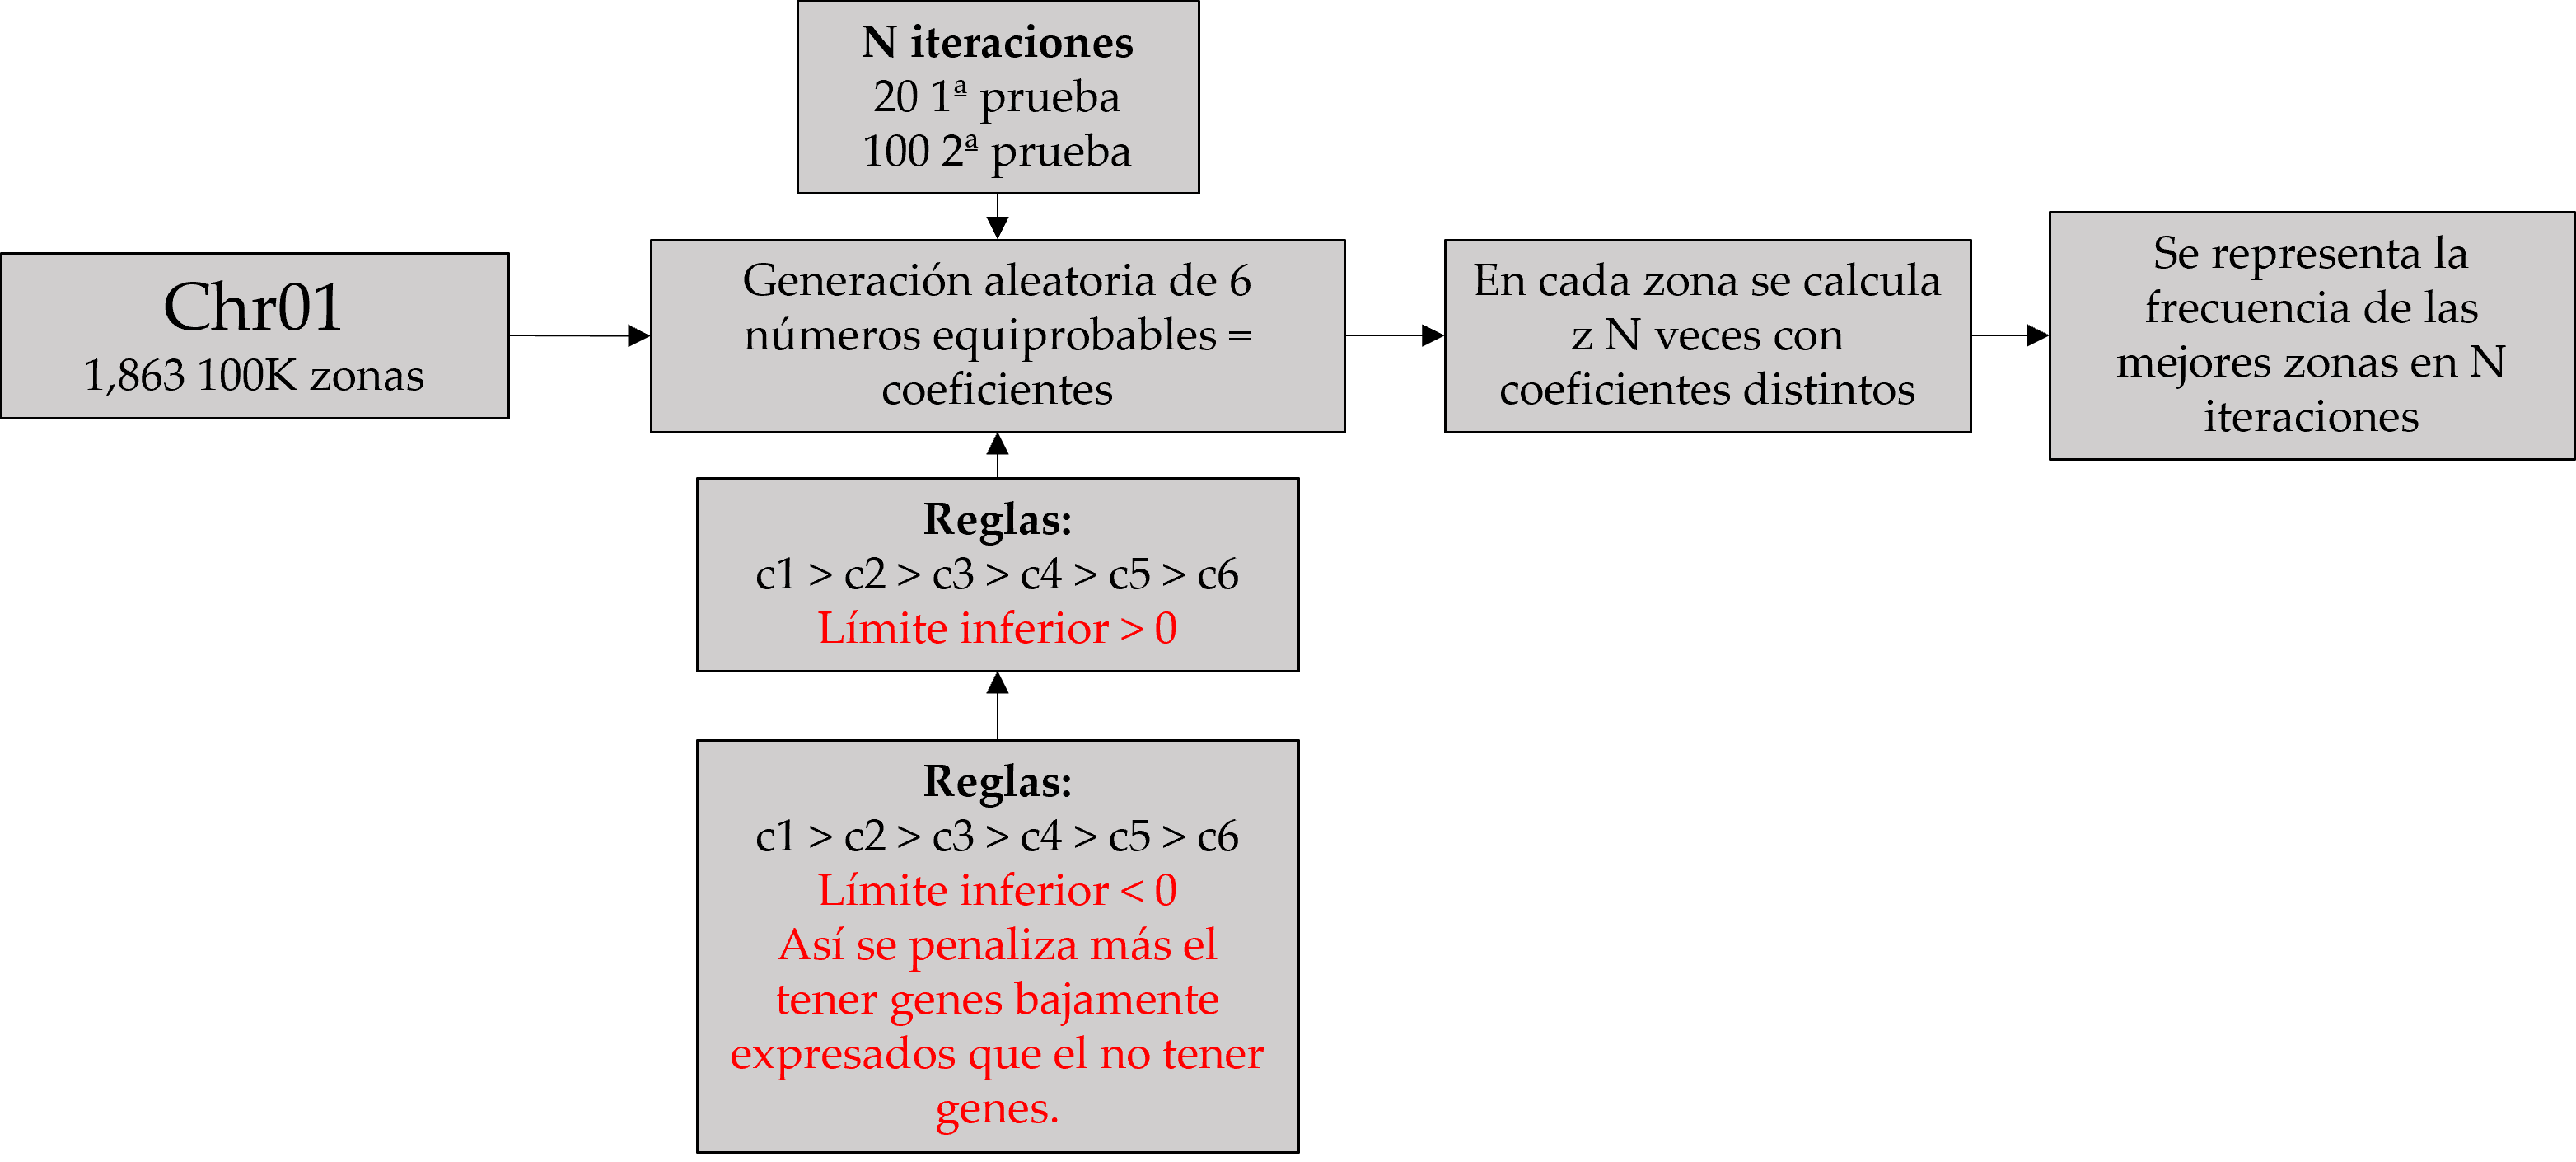

In [148]:
Image(filename="./Figure_coef3.png")

# Generación de coeficientes aleatorios
Cálculo de z si x son valores de abundancia relativa y no de abundancia absoluta.

In [12]:
n_iter = 20 # número de iteraciones.
coef = {}
for i in range(n_iter):
    list_coef = sorted(np.random.uniform(-10, 10, 6), reverse = True)
    print(list_coef)
    coef[i] = list_coef

[8.701871562284992, 7.846908821304456, 5.515996138842887, 5.45696870576103, 2.2940987882132564, 1.408641976046665]
[6.152782451693913, 6.0020370852810885, 2.5625171540923137, 1.7200634832418444, 0.5102020039542872, -6.936520201748024]
[9.93260670719188, 8.990855867617107, 4.453630162610542, -6.144303934359002, -6.302157624303213, -7.9828078081684435]
[8.414324139060888, 4.876509519745225, -1.3386573228251724, -2.0014176804300305, -9.155876900960342, -9.54662350009421]
[9.181906846686289, 5.184616430502347, -3.070228879605499, -5.516085177154202, -6.63013839639357, -9.21986088471245]
[3.0032538484892903, 2.940226479114706, -1.3572109920927211, -3.1294371083508548, -8.31450101101537, -9.335217048219487]
[9.7504120363816, 6.349447913060466, 4.826331807547087, -0.7868035189490357, -9.59979198065, -9.891399488162655]
[8.253235720936637, 4.065927470589944, 3.0498184167382263, -1.4785971033661518, -2.8719217117298186, -5.651296564109682]
[9.715815258096068, 5.952968759948419, 5.11212531191778

In [33]:
idoneidad = {}
for interval, values in intervals_chr01.items():
    for n in range(n_iter):
        chr01_values = chr01[(values[0] <= chr01["Start"]) & (chr01["Start"] < values[1])]
        n_genes = len(chr01_values[chr01_values['quintile'].notna()])
        if n_genes != 0:
            z = coef[n][0] * (len(chr01_values[chr01_values["quintile"] == 5])/n_genes)*100 + coef[n][1] * (len(chr01_values[chr01_values["quintile"] == 4])/n_genes)*100 + coef[n][2] * (len(chr01_values[chr01_values["quintile"] == 3])/n_genes)*100 + coef[n][3] * (len(chr01_values[chr01_values["quintile"] == 2])/n_genes)*100 + coef[n][4] * (len(chr01_values[chr01_values["quintile"] == 1])/n_genes)*100 + coef[n][5] * (len(chr01_values[chr01_values["quintile"] == 0])/n_genes)*100
            idoneidad.setdefault(interval, []).append(z)

In [34]:
top_zones = []

for n in range(n_iter):
    z_max = -1000
    for k, v in idoneidad.items():
        if v[n] > z_max:
            z_max = v[n]
            window_max = k
    top_zones.append(window_max)

In [35]:
top_zones_freq = {}
for zone in top_zones:
    top_zones_freq[str(zone)] = top_zones_freq.get(str(zone), 0) + 1

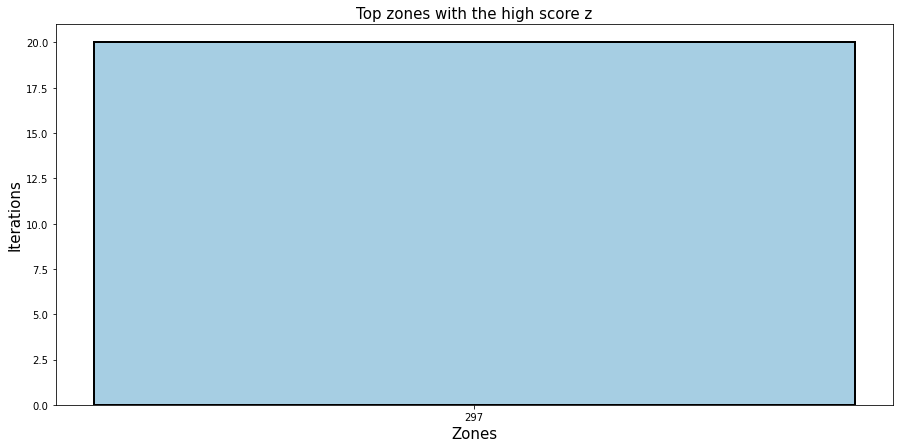

In [36]:
# Set colors to the bars using colormaps available in matplotlib

plt.figure(figsize=[15, 7])
col_map = plt.get_cmap('Paired')

# Creating a bar chart with bars of different color using colormap
plt.bar(list(top_zones_freq.keys()), list(top_zones_freq.values()), width=0.7, color=col_map.colors, edgecolor='k', 
        linewidth=2)

plt.title('Top zones with the high score z', fontsize=15)
plt.xlabel('Zones', fontsize=15)
plt.ylabel('Iterations', fontsize=15)
plt.show()

In [38]:
n_iter = 100 # número de iteraciones.
coef = {}
for i in range(n_iter):
    list_coef = sorted(np.random.uniform(-10, 10, 6), reverse = True)
    #print(list_coef)
    coef[i] = list_coef

In [39]:
idoneidad = {}
for interval, values in intervals_chr01.items():
    for n in range(n_iter):
        chr01_values = chr01[(values[0] <= chr01["Start"]) & (chr01["Start"] < values[1])]
        n_genes = len(chr01_values[chr01_values['quintile'].notna()])
        if n_genes != 0:
            z = coef[n][0] * (len(chr01_values[chr01_values["quintile"] == 5])/n_genes)*100 + coef[n][1] * (len(chr01_values[chr01_values["quintile"] == 4])/n_genes)*100 + coef[n][2] * (len(chr01_values[chr01_values["quintile"] == 3])/n_genes)*100 + coef[n][3] * (len(chr01_values[chr01_values["quintile"] == 2])/n_genes)*100 + coef[n][4] * (len(chr01_values[chr01_values["quintile"] == 1])/n_genes)*100 + coef[n][5] * (len(chr01_values[chr01_values["quintile"] == 0])/n_genes)*100
            idoneidad.setdefault(interval, []).append(z)

In [40]:
top_zones = []

for n in range(n_iter):
    z_max = -1000
    for k, v in idoneidad.items():
        if v[n] > z_max:
            z_max = v[n]
            window_max = k
    top_zones.append(window_max)

In [42]:
top_zones_freq = {}
for zone in top_zones:
    top_zones_freq[str(zone)] = top_zones_freq.get(str(zone), 0) + 1

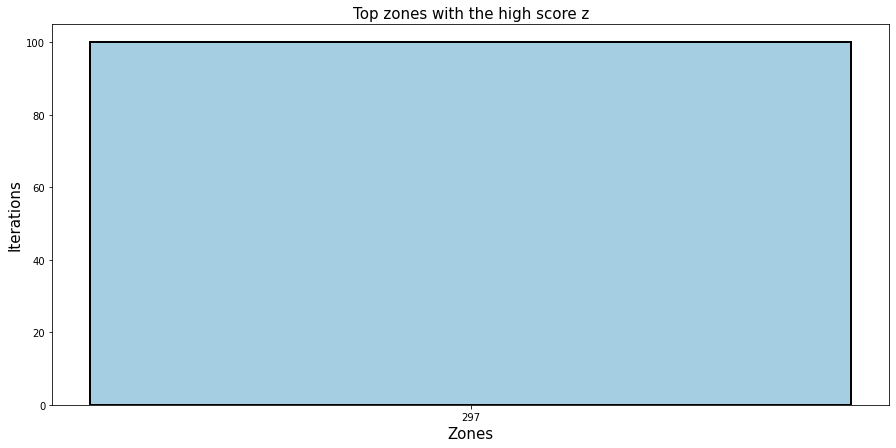

In [43]:
# Set colors to the bars using colormaps available in matplotlib

plt.figure(figsize=[15, 7])
col_map = plt.get_cmap('Paired')

# Creating a bar chart with bars of different color using colormap
plt.bar(list(top_zones_freq.keys()), list(top_zones_freq.values()), width=0.7, color=col_map.colors, edgecolor='k', 
        linewidth=2)

plt.title('Top zones with the high score z', fontsize=15)
plt.xlabel('Zones', fontsize=15)
plt.ylabel('Iterations', fontsize=15)
plt.show()

In [44]:
intervals_chr01[297]

[29600001, 29700000]

In [45]:
a = chr01[(29600001 <= chr01["Start"]) & (chr01["Start"] < 29700000)]

In [46]:
a

,Chr,Start,End,quintile
Niben261Chr01g0296010,Chr01,29654228,29657594,5.0
Niben261Chr01g0297001,Chr01,29673927,29676788,NaN


In [50]:
intervals_chr01[1517]

[151600001, 151700000]

In [51]:
b = chr01[(151600001 <= chr01["Start"]) & (chr01["Start"] < 151700000)]

In [52]:
b

,Chr,Start,End,quintile
Niben261Chr01g1516006,Chr01,151640436,151641709,4.0
Niben261Chr01g1516003,Chr01,151646980,151651689,5.0
Niben261Chr01g1516002,Chr01,151656898,151660096,2.0
Niben261Chr01g1516017,Chr01,151670927,151680247,1.0


# Prueba x absoluto sin ventanas sin genes:
* Ventana 1000K.
* Coef: -10 a 10.
* n_iter: 20, 100.
* x absoluto.
* Requisito: ventana con genes asignados a una categoría.

In [8]:
# Intervalos de 100K del Chr01:
window = 1000000 # 1000K.
intervals_chr01 = split(chr_len["Niben261Chr01"], window)

In [56]:
n_iter = 100 # número de iteraciones.
coef = {}
for i in range(n_iter):
    list_coef = sorted(np.random.uniform(1, 10, 3), reverse = True) + sorted(np.random.uniform(-10, -1, 3), reverse = True)
    #print(list_coef)
    coef[i] = list_coef

In [57]:
idoneidad = {}
for interval, values in intervals_chr01.items():
    for n in range(n_iter):
        chr01_values = chr01[(values[0] <= chr01["Start"]) & (chr01["Start"] < values[1])]
        n_genes = len(chr01_values[chr01_values['quintile'].notna()])
        if n_genes != 0:
            z = coef[n][0] * len(chr01_values[chr01_values["quintile"] == 5]) + coef[n][1] * len(chr01_values[chr01_values["quintile"] == 4]) + coef[n][2] * len(chr01_values[chr01_values["quintile"] == 3]) + coef[n][3] * len(chr01_values[chr01_values["quintile"] == 2]) + coef[n][4] * len(chr01_values[chr01_values["quintile"] == 1]) + coef[n][5] * len(chr01_values[chr01_values["quintile"] == 0])
            idoneidad.setdefault(interval, []).append(z)

In [58]:
top_zones = []

for n in range(n_iter):
    z_max = -10000000
    for k, v in idoneidad.items():
        if v[n] > z_max:
            z_max = v[n]
            window_max = k
    top_zones.append(window_max)

In [59]:
#top_zones

In [60]:
top_zones_freq = {}
for zone in top_zones:
    top_zones_freq[str(zone)] = top_zones_freq.get(str(zone), 0) + 1

In [61]:
top_zones_freq

{'171': 45, '94': 25, '156': 28, '148': 2}

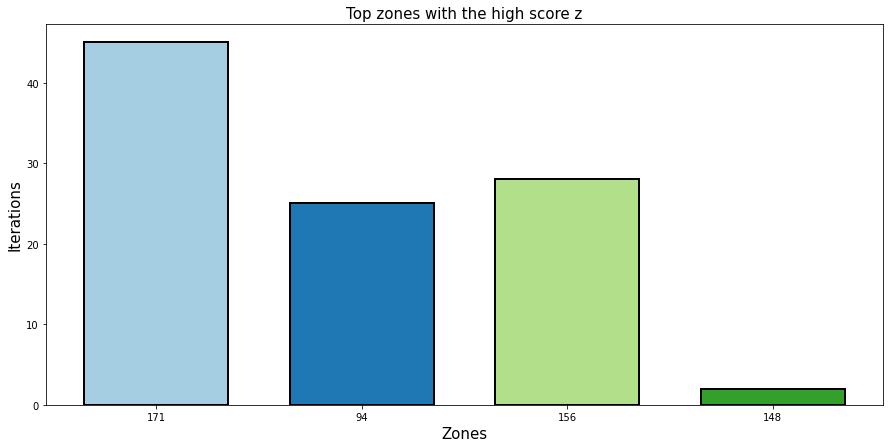

In [62]:
# Set colors to the bars using colormaps available in matplotlib

plt.figure(figsize=[15, 7])
col_map = plt.get_cmap('Paired')

# Creating a bar chart with bars of different color using colormap
plt.bar(list(top_zones_freq.keys()), list(top_zones_freq.values()), width=0.7, color=col_map.colors, edgecolor='k', 
        linewidth=2)

plt.title('Top zones with the high score z', fontsize=15)
plt.xlabel('Zones', fontsize=15)
plt.ylabel('Iterations', fontsize=15)
plt.show()

In [98]:
chr01[(chr01["Start"] > intervals_chr01[94][0]) & (chr01["Start"] < intervals_chr01[94][1]) & (chr01["quintile"] == 0)]

,Chr,Start,End,quintile


# Prueba x frecuencias sin ventanas sin genes:
* Ventana 1000K.
* Coef: -10 a 10.
* n_iter: 20, 100.
* x frecuencias.
* Requisito: ventana con genes asignados a una categoría.

In [81]:
# Intervalos de 100K del Chr01:
window = 1000000 # 1000K.
intervals_chr01 = split(chr_len["Niben261Chr01"], window)

In [87]:
n_iter = 100 # número de iteraciones.
coef = {}
for i in range(n_iter):
    list_coef = sorted(np.random.uniform(1, 10, 3), reverse = True) + sorted(np.random.uniform(-10, -1, 3), reverse = True)
    #print(list_coef)
    coef[i] = list_coef

In [88]:
idoneidad = {}
for interval, values in intervals_chr01.items():
    for n in range(n_iter):
        chr01_values = chr01[(values[0] <= chr01["Start"]) & (chr01["Start"] < values[1])]
        n_genes = len(chr01_values[chr01_values['quintile'].notna()])
        if n_genes != 0:
            z = coef[n][0] * (len(chr01_values[chr01_values["quintile"] == 5])/n_genes)*100 + coef[n][1] * (len(chr01_values[chr01_values["quintile"] == 4])/n_genes)*100 + coef[n][2] * (len(chr01_values[chr01_values["quintile"] == 3])/n_genes)*100 + coef[n][3] * (len(chr01_values[chr01_values["quintile"] == 2])/n_genes)*100 + coef[n][4] * (len(chr01_values[chr01_values["quintile"] == 1])/n_genes)*100 + coef[n][5] * (len(chr01_values[chr01_values["quintile"] == 0])/n_genes)*100
            idoneidad.setdefault(interval, []).append(z)

In [89]:
top_zones = []

for n in range(n_iter):
    z_max = -1000
    for k, v in idoneidad.items():
        if v[n] > z_max:
            z_max = v[n]
            window_max = k
    top_zones.append(window_max)

In [90]:
top_zones_freq = {}
for zone in top_zones:
    top_zones_freq[str(zone)] = top_zones_freq.get(str(zone), 0) + 1

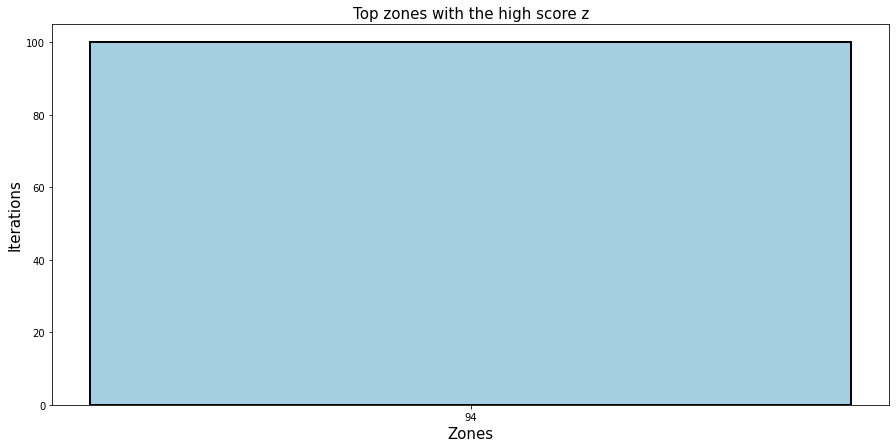

In [91]:
# Set colors to the bars using colormaps available in matplotlib

plt.figure(figsize=[15, 7])
col_map = plt.get_cmap('Paired')

# Creating a bar chart with bars of different color using colormap
plt.bar(list(top_zones_freq.keys()), list(top_zones_freq.values()), width=0.7, color=col_map.colors, edgecolor='k', 
        linewidth=2)

plt.title('Top zones with the high score z', fontsize=15)
plt.xlabel('Zones', fontsize=15)
plt.ylabel('Iterations', fontsize=15)
plt.show()